In [5]:
import json
import base64
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import matplotlib.pyplot as plt
from plots import displayImagesWithBoxesYolo

In [6]:
# Define the API base URL
BASE_URL = "http://127.0.0.1:8000"


# Test the /models endpoint
def test_list_models():
    response = requests.get(f"{BASE_URL}/apis")
    print("Models List:", response.json())


def test_segment_image_api(image_path):
    with open(image_path, "rb") as image_file:
        files = {"file": image_file}
        response = requests.post(BASE_URL + "/segment", files=files)

    if response.status_code == 200:
        resp = response.content.decode("utf-8")
        resp = json.loads(resp)
        image_data = base64.b64decode(resp["image"])

        segmented_image = Image.open(BytesIO(image_data))
        return segmented_image
    else:
        print(f"Failed to segment image. Status code: {response.status_code}")


# Test the /detect endpoint
def test_detect_bbox(image_path):
    with open(image_path, "rb") as image_file:
        files = {"file": image_file}
        response = requests.post(f"{BASE_URL}/detect", files=files)
        if response.status_code == 200:
            resp = response.content.decode("utf-8")
            resp = json.loads(resp)
            print("Detection successful")

    return resp


import os


# Test the /detect_image endpoint
def test_detect_bbox_image(image_path):
    with open(image_path, "rb") as image_file:
        files = {"file": image_file}
        response = requests.post(f"{BASE_URL}/detect_image", files=files)
        if response.status_code == 200:
            resp = response.content.decode("utf-8")
            resp = json.loads(resp)
            image_data = base64.b64decode(resp["image"])
            imageWithBoxes = Image.open(BytesIO(image_data))
            print("Detection successful")
    return imageWithBoxes


# Execute tests
if __name__ == "__main__":
    test_list_models()
    # test_detect_bbox_image("test_image.jpg")  # Replace with your image path

Models List: {'models': [{'name': 'Segmentation Model', 'type': 'ONNX', 'path': './bestModels/fcn.onnx'}, {'name': 'Bounding Box Model', 'type': 'Pytorch', 'path': './bestModels/yolo.pt'}]}


In [10]:
segmentedImage = test_segment_image_api(
    "./data/rgb_0690.png"
)  # Replace with your image paths

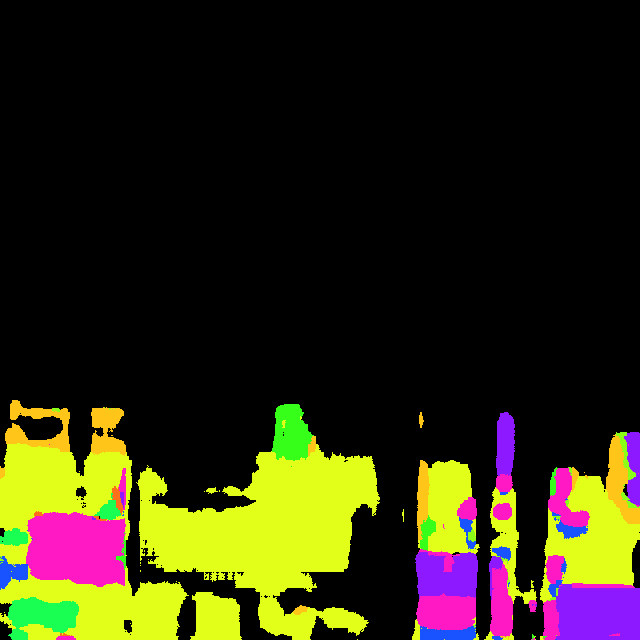

In [11]:
segmentedImage

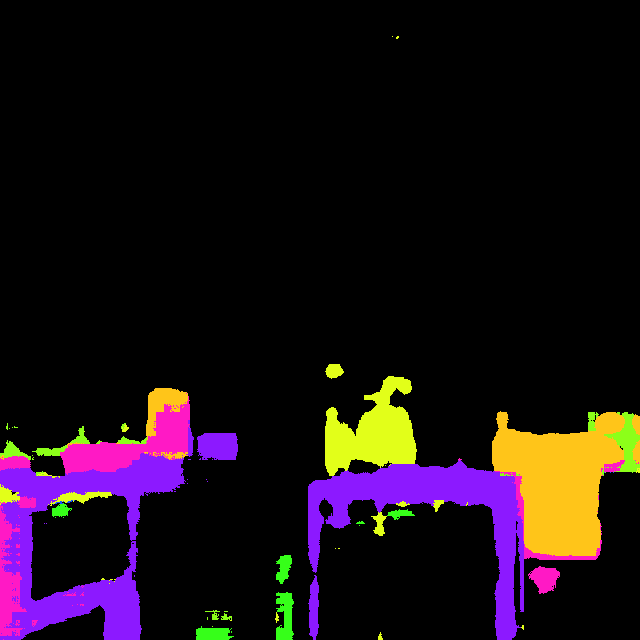

In [4]:
segmentedImage

In [5]:
yoloOutput = test_detect_bbox("./data/rgb_0630.png")

Detection successful


In [6]:
yoloOutput

{'boxes': [[0.03359375149011612,
   0.6923611164093018,
   0.05937499925494194,
   0.0763888880610466],
  [0.947265625, 0.7097222208976746, 0.01328125037252903, 0.02500000037252903],
  [0.9527343511581421, 0.6576389074325562, 0.04296875, 0.02638888917863369],
  [0.9546874761581421,
   0.7097222208976746,
   0.04374999925494194,
   0.0416666679084301],
  [0.44804686307907104, 0.6472222208976746, 0.02734375, 0.0972222238779068],
  [0.8792968988418579, 0.8194444179534912, 0.14453125, 0.09444444626569748]],
 'classes': [6, 2, 2, 2, 6, 2],
 'confidences': [0.41088610887527466,
  0.4418026804924011,
  0.44754400849342346,
  0.5233378410339355,
  0.5240503549575806,
  0.6531447172164917]}

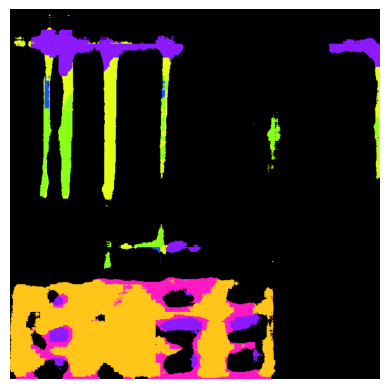

In [7]:
image = Image.open("./data/rgb_0630.png")
# Scale the box dimensions with the image dimensions
image_width, image_height = image.size

for box in yoloOutput["boxes"]:
    xcenter = box[0] * image_width
    ycenter = box[1] * image_height
    width = box[2] * image_width
    height = box[3] * image_height

    # Extract rectangle from the image based on scaled box coordinates
    box_image = image.crop(
        (
            xcenter - width / 2,
            ycenter - height / 2,
            xcenter + width / 2,
            ycenter + height / 2,
        )
    )
    box_image.save("./tmp.png")
    segImage = test_segment_image_api("./tmp.png")
    # Plot the extracted rectangle
    plt.imshow(segImage)
    plt.axis("off")
    plt.show()
    break

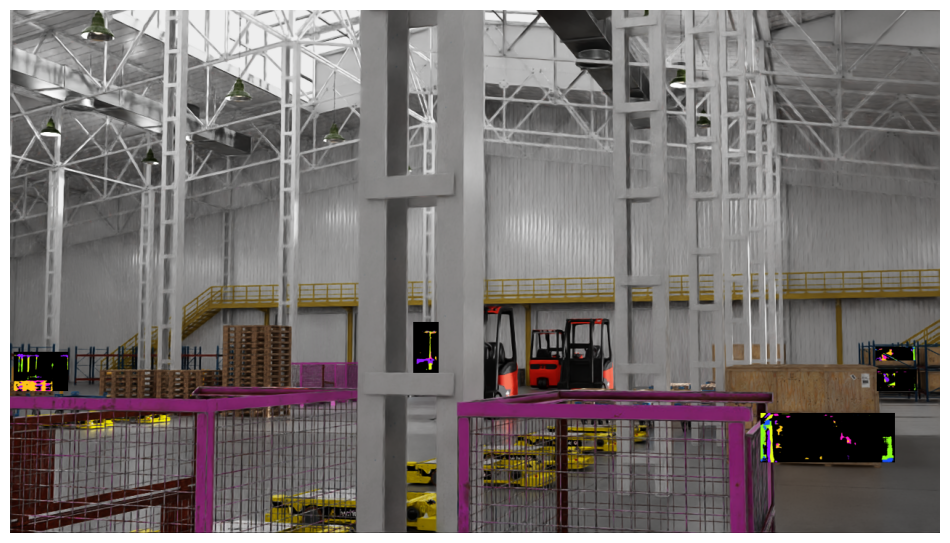

In [17]:
image = Image.open("./data/rgb_0630.png")
# Scale the box dimensions with the image dimensions
image_width, image_height = image.size

for box in yoloOutput["boxes"]:
    xcenter = box[0] * image_width
    ycenter = box[1] * image_height
    width = box[2] * image_width
    height = box[3] * image_height

    # Extract rectangle from the image based on scaled box coordinates
    box_image = image.crop(
        (
            xcenter - width / 2,
            ycenter - height / 2,
            xcenter + width / 2,
            ycenter + height / 2,
        )
    )
    box_image.save("./tmp.png")
    segImage = test_segment_image_api("./tmp.png")

    # Resize segImage to match the original box dimensions
    segImage_resized = segImage.resize((int(width), int(height)))

    # Paste the resized segmented image back onto the original image
    image.paste(segImage_resized, (int(xcenter - width / 2), int(ycenter - height / 2)))

# Display the modified original image
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

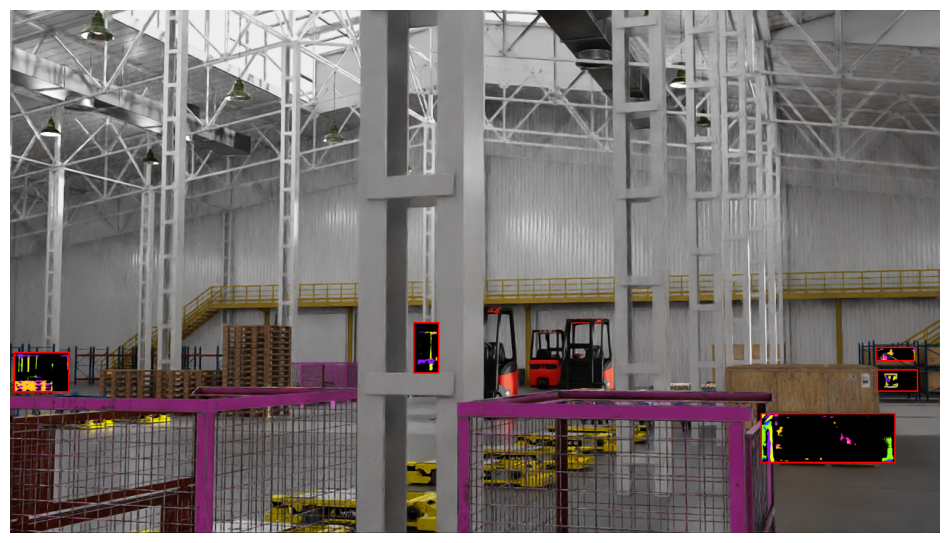

In [24]:
image = Image.open("./data/rgb_0630.png")
# Scale the box dimensions with the image dimensions
image_width, image_height = image.size

# Create a draw object
draw = ImageDraw.Draw(image)

for box in yoloOutput["boxes"]:
    xcenter = box[0] * image_width
    ycenter = box[1] * image_height
    width = box[2] * image_width
    height = box[3] * image_height

    # Calculate box coordinates
    x1 = int(xcenter - width / 2)
    y1 = int(ycenter - height / 2)
    x2 = int(xcenter + width / 2)
    y2 = int(ycenter + height / 2)

    # Extract rectangle from the image based on scaled box coordinates
    box_image = image.crop((x1, y1, x2, y2))
    box_image.save("./tmp.png")
    segImage = test_segment_image_api("./tmp.png")

    # Resize segImage to match the original box dimensions
    segImage_resized = segImage.resize((int(width), int(height)))

    # Paste the resized segmented image back onto the original image
    image.paste(segImage_resized, (x1, y1))

    # Draw rectangle for the bounding box
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

# Display the modified original image
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

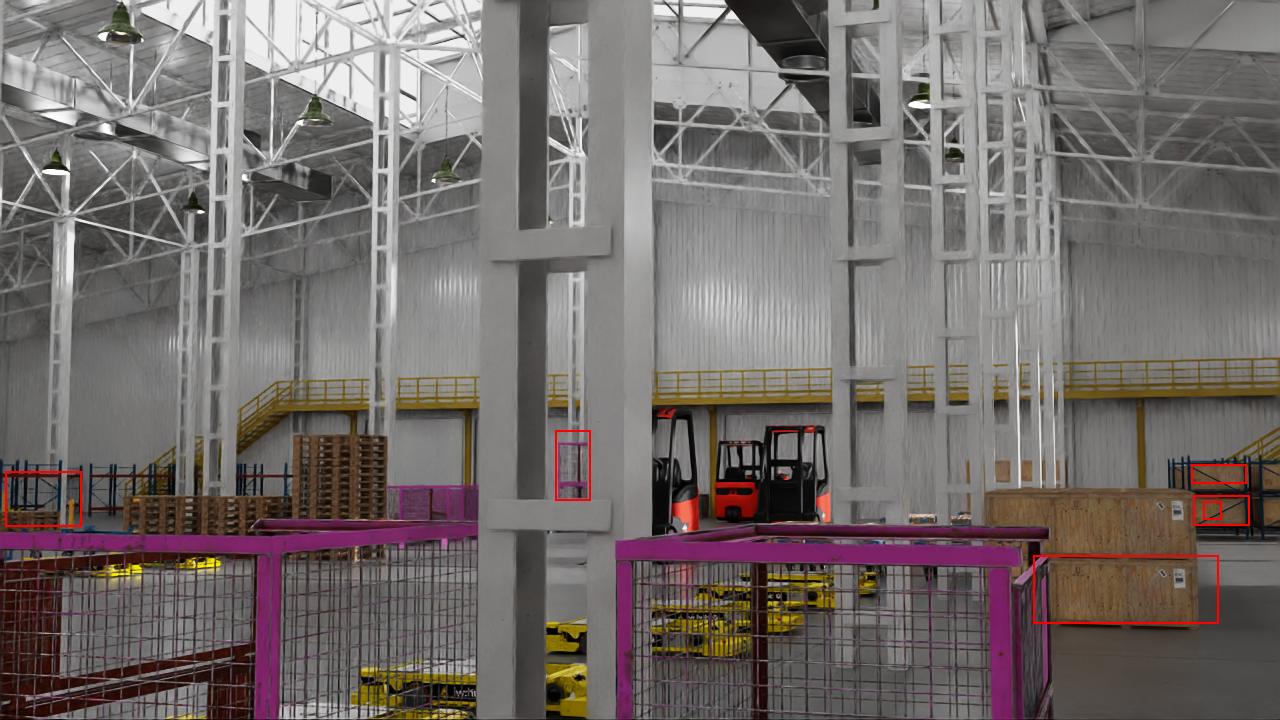

In [ ]:
displayImagesWithBoxesYolo("./data/rgb_0630.png", yoloOutput["boxes"])

In [8]:
image = test_detect_bbox_image("./data/rgb_0630.png")

Detection successful


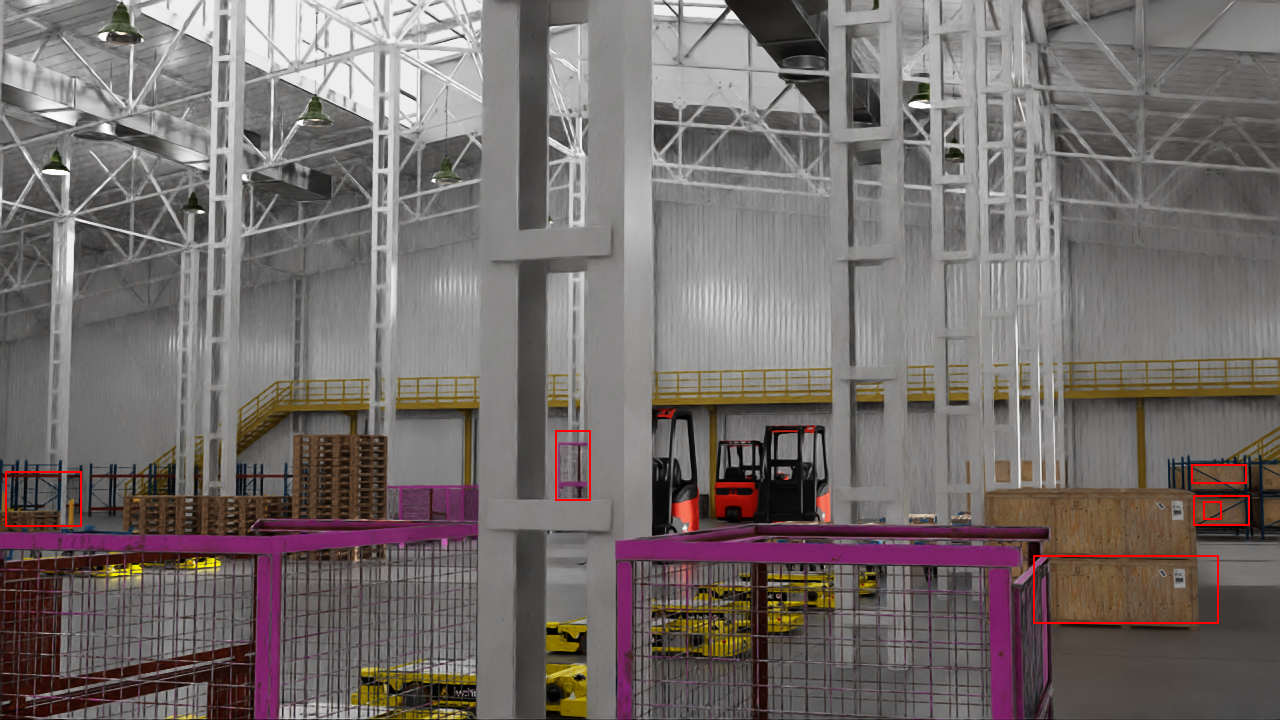

In [9]:
image

In [ ]:
5

5